In [1]:
import nklsgen
import perlin_ls_gen

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
help(perlin_ls_gen.generate_landscapes)

Help on function generate_landscapes in module perlin_ls_gen:

generate_landscapes(width, height, scale, number)



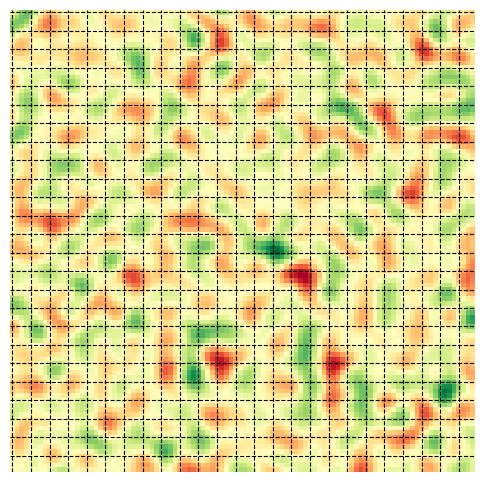

In [4]:
plt.figure(figsize=(6,6))
plt.xticks(range(50))
plt.yticks(range(50))
plt.grid(color='black',linestyle='--')

landscapes = perlin_ls_gen.generate_landscapes(100,100,6,1)
sns.heatmap(landscapes[0], cmap=sns.color_palette("RdYlGn", as_cmap=True), cbar=False)

plt.tick_params(left = False,right = False,labelleft = False,
                labelbottom = False,bottom = False) 

In [5]:
help(nklsgen.generate_landscapes)

Help on function generate_landscapes in module nklsgen:

generate_landscapes(N, K, num_of_ls=1, base=2, smooth=[0, 1, 0], preprocessed=True)
    This function wraps the generation function and does some processing on landscapes
    
    Parameters
    ----------
    N : int
        number of alleles
    K : int
        number of interactions between alleles (same for every allele)
    num_of_ls : int
        number of landscapes to generate
    smooth : list
        parameters for landscape smoothing; [0]=times, [1]=stride
    preprocessed : boolean
        Reformats each landscape in the landscapes np.array from np.array to dict where:
            landscapes[i].keys() => strings of binary values '01101101'
            landscapes[i].values() => [0,1] normalized floats 
        
    Returns
    ----------
    landscapes_ : np.array of np.arrays
    OR 
    landscapes : np.array of dicts



<Axes: >

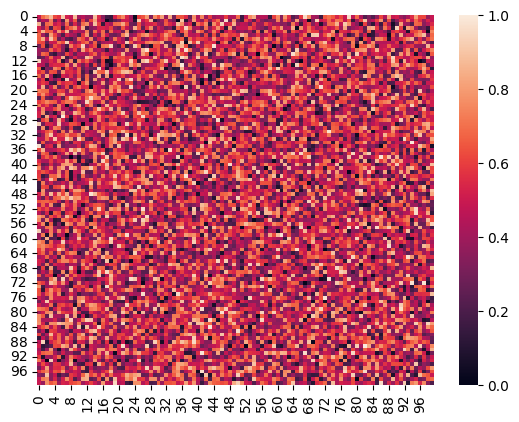

In [6]:
landscapes = nklsgen.generate_landscapes(2,1,1, base=100)
sns.heatmap(landscapes[0])

<Axes: >

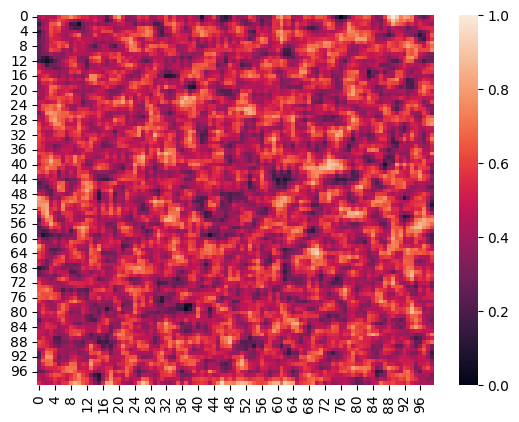

In [7]:
landscapes = nklsgen.generate_landscapes(2,1,1,smooth=[1,1,0],base=100)
sns.heatmap(landscapes[0])

<Axes: >

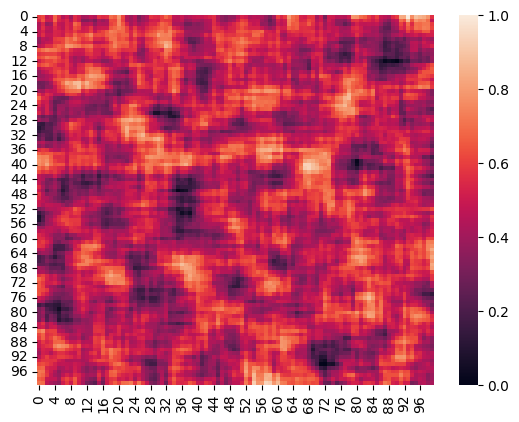

In [8]:
landscapes = nklsgen.generate_landscapes(2,1,1,smooth=[1,3,0],base=100)
sns.heatmap(landscapes[0])

In [9]:
ls = landscapes[0]
locs = [loc for loc,val in np.ndenumerate(ls)]
vals = [val for loc,val in np.ndenumerate(ls)]
x = [a[0] for a in locs]
y = [a[1] for a in locs]
data = {'x':x, 'y':y, 'val':vals}
df_ = pd.DataFrame(data)
df_ = df_.pivot(index='x', columns='y', values='val')
x_ = np.tile(np.array(df_.index), (len(df_.index),1)).T
y_ = np.tile(np.array(df_.columns), (len(df_.columns),1))
z_ = df_.values

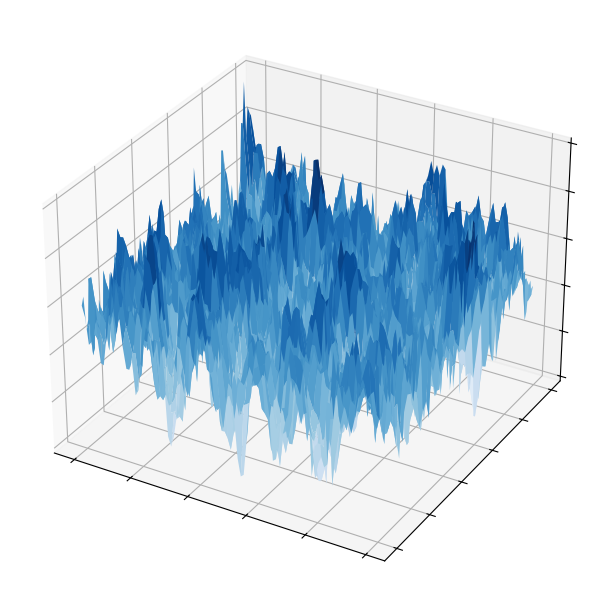

In [10]:
from matplotlib import cm

plt.style.use('_mpl-gallery')

# Plot the surface
fig, ax = plt.subplots(figsize=(6,6),subplot_kw={"projection": "3d"})
ax.plot_surface(x_,y_,z_, vmin=z_.min() * 2, cmap=cm.Blues)

# Remove ticks
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

# plt.savefig('landscape_visuals/nk_100x100.pdf')
plt.show()